In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [ ]:
import seaborn as sns
my_data=sns.load_dataset("iris")
my_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
my_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
my_data.shape

(150, 5)

In [ ]:
my_data['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
# splitting dataset into features and target
features=my_data.drop('species',axis=1)
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
target=my_data[['species']]
target

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [ ]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   species  150 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [ ]:
features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
features.shape

(150, 4)

In [ ]:
target.shape

(150, 1)

## **Preprocessing the Dataset**

In [ ]:
# checking the null values in the data
features.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0


In [ ]:
target.isnull().sum()

,0
species,0


# **Exploratory data analysis**

<Axes: >

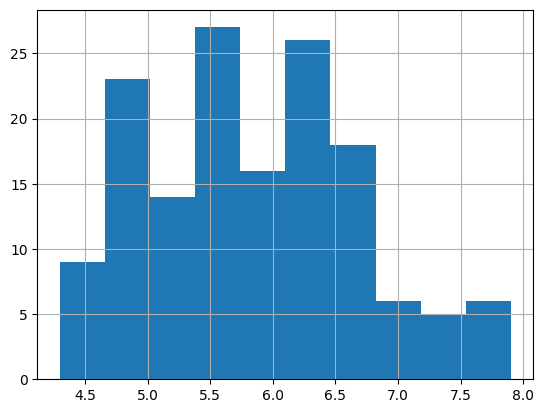

In [ ]:
# histogram plots
features['sepal_length'].hist()

<Axes: >

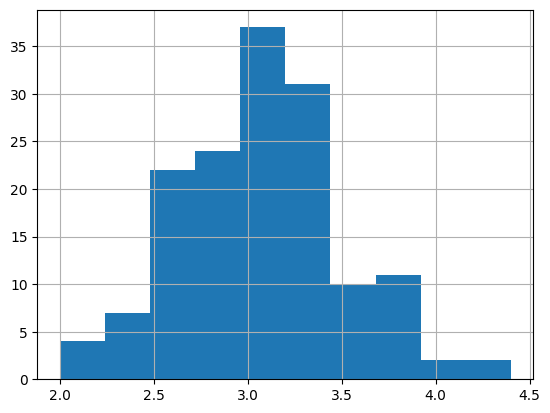

In [ ]:
features['sepal_width'].hist()

<Axes: >

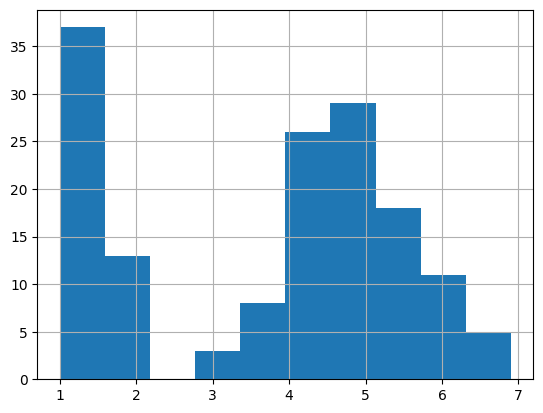

In [ ]:
features['petal_length'].hist()

<Axes: >

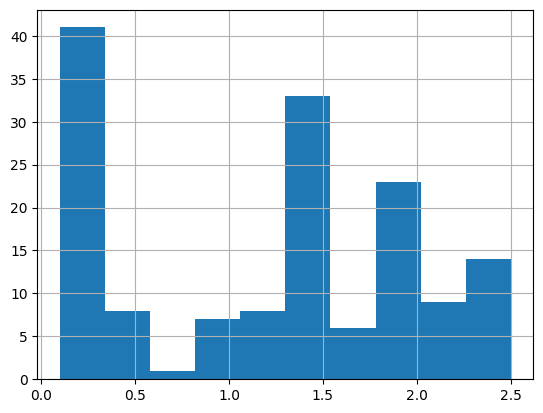

In [ ]:
features['petal_width'].hist()

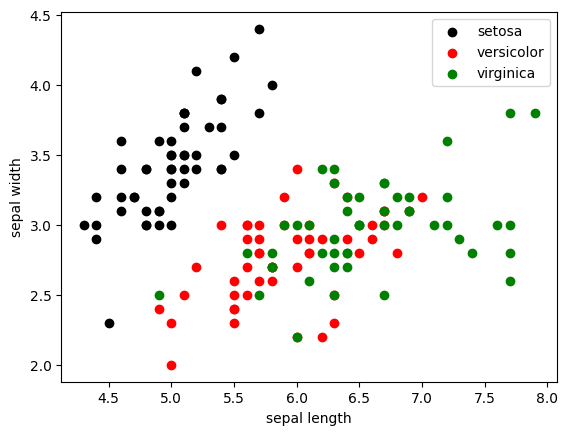

In [ ]:
# Scatterplot
color = ['black','red','green']
species = ['setosa','versicolor','virginica']
for i in range(3):
    x = my_data[my_data['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c = color[i],label = species[i])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

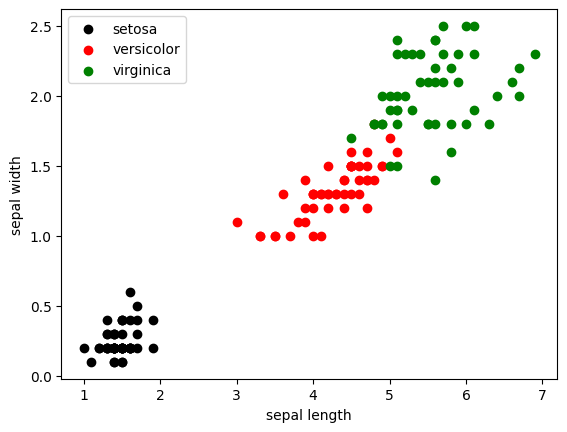

In [ ]:
for i in range(3):
    x = my_data[my_data['species'] == species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c = color[i],label = species[i])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

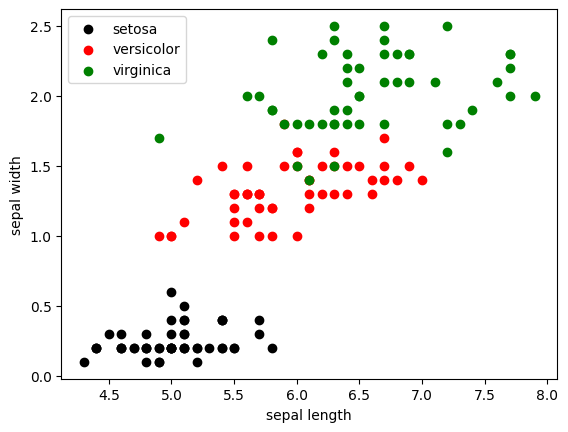

In [ ]:
for i in range(3):
    x = my_data[my_data['species'] == species[i]]
    plt.scatter(x['sepal_length'],x['petal_width'],c = color[i],label = species[i])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

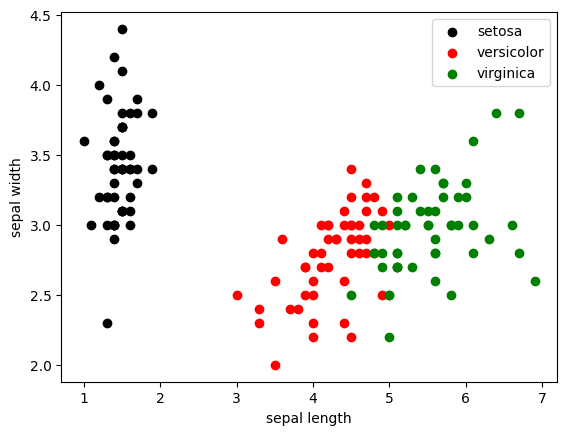

In [ ]:
for i in range(3):
    x = my_data[my_data['species'] == species[i]]
    plt.scatter(x['petal_length'],x['sepal_width'],c = color[i],label = species[i])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

In [ ]:
# Correlation matrix
features.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

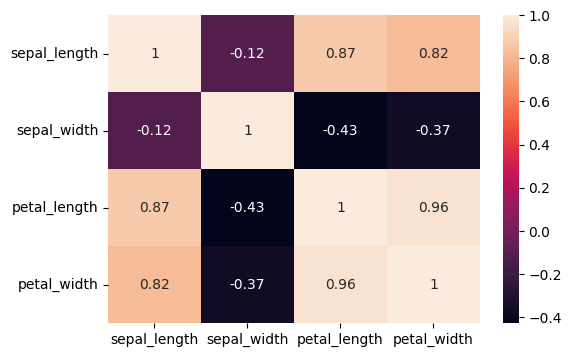

In [ ]:
correlation = features.corr()
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(correlation, annot = True,ax=ax)

# **Label Encoder**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
label_encoder=LabelEncoder()
target['species'] = label_encoder.fit_transform(target['species'])
target

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


# **Model Training**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=100)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(105, 4)
(105, 1)
(45, 4)
(45, 1)


In [ ]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=log_reg.predict(x_test)
y_pred


array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

In [ ]:
accuracy_score(y_test,y_pred)*100

97.77777777777777

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred1=knn.predict(x_test)
y_pred1

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

In [ ]:
accuracy_score(y_test,y_pred1)*100

97.77777777777777

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier()

In [ ]:
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=4)
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
y_pred2=dec_tree.predict(x_test)
y_pred2

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0])

In [ ]:
accuracy_score(y_test,y_pred2)*100

95.55555555555556

In [ ]:
# GRIDSEARCH
from sklearn.model_selection import GridSearchCV
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7,8,9,10]}
grid_search=GridSearchCV(dec_tree,params)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}

In [ ]:
from sklearn.model_selection import GridSearchCV
value = range(0,10)
params=dict(n_neighbors=value)
grid_search=GridSearchCV(knn,params)
grid_search.fit(x_train,y_train)


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': range(0, 10)})

In [ ]:
grid_search.best_params_

{'n_neighbors': 3}

# **Confusion Matrix**

In [ ]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 17]])

Text(50.722222222222214, 0.5, 'Actual')

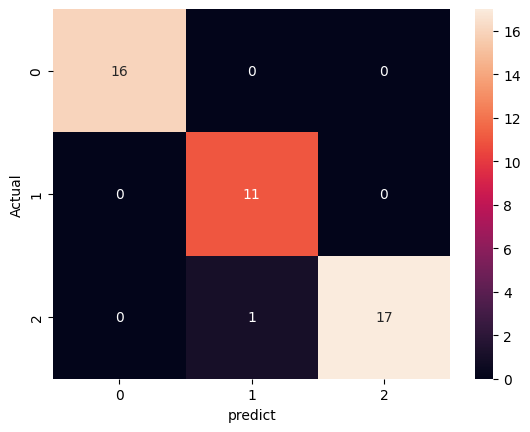

In [ ]:
import seaborn as sns
sns.heatmap(conf,annot=True)
plt.xlabel('predict')
plt.ylabel('Actual')

In [ ]:
y_test.value_counts()

,count
species,
2,18
0,16
1,11


In [ ]:
y_test.sum()

,0
species,47


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

